<a href="https://colab.research.google.com/github/SAHIL-RAY/CNN-Project1/blob/main/CNN-project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Object Detection using Convolutional Neural Network**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
img=image.load_img("/content/drive/MyDrive/basedata/test/bed_room/bed-1846251__340.jpg")

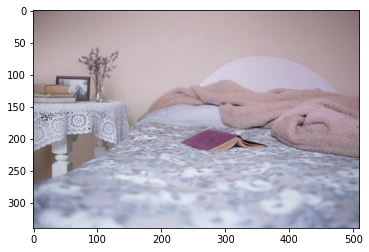

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/basedata/test/bed_room/bed-1846251__340.jpg").shape

(340, 510, 3)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/basedata/train', target_size=(200,200), batch_size=3, class_mode='binary')

Found 20 images belonging to 2 classes.


In [ ]:
validation_dataset=train.flow_from_directory('/content/drive/MyDrive/basedata/validation', target_size=(200,200), batch_size=3, class_mode='binary')

Found 20 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'bade_room': 0, 'dinning_room': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

**Training Model**

In [ ]:
model=tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),tf.keras.layers.MaxPool2D(2,2),
 #
 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),tf.keras.layers.MaxPool2D(2,2), 
 #
 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),tf.keras.layers.MaxPool2D(2,2),  
 ##
 tf.keras.layers.Flatten(),
 ##
 tf.keras.layers.Dense(512,activation='relu'),
 ##
 tf.keras.layers.Dense(1,activation='sigmoid')                               
]
    
)

In [ ]:

model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset, steps_per_epoch=3,epochs=30, validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 2s 687ms/step - loss: 0.0582 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 2s 654ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 2s 660ms/step - loss: 0.2342 - accuracy: 0.8750 - val_loss: 0.5461 - val_accuracy: 0.8000
Epoch 4/30
3/3 [==============================] - 2s 657ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 2s 648ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9500
Epoch 6/30
3/3 [==============================] - 2s 637ms/step - loss: 0.0662 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9500
Epoch 7/30
3/3 [==============================] - 2s 646ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 0.9500
Epoch 8/30
3/3 [====

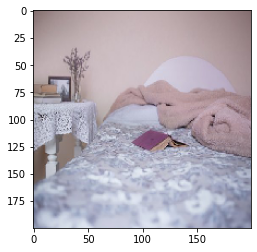

Bed Room


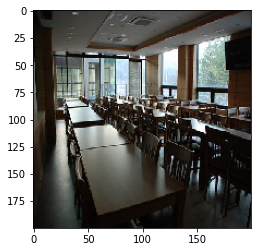

Dinning Room


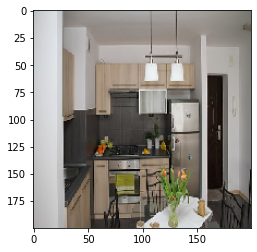

Dinning Room


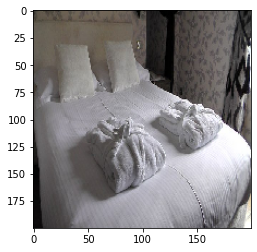

Bed Room


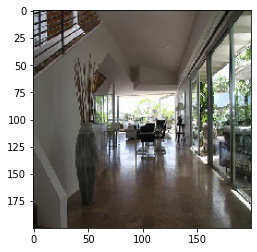

Dinning Room


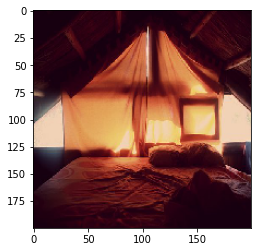

Bed Room


In [ ]:
dir_path='/content/drive/MyDrive/Test'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200,3))
    plt.imshow(img)
    plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val==0:
      print('Bed Room')
    else :
      print('Dinning Room')  